# Chapter 3

## Understanding Data Wrangling
### Data transformation

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
wide_df = pd.read_csv('../data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('../data/long_data.csv', usecols=['date', 'datatype', 'value'],
                        parse_dates=['date'])[['date', 'datatype', 'value']]

#### Wide Data format

In [4]:
wide_df.head(6)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9
5,2018-10-06,20.0,13.3,16.1


In [5]:
wide_df.describe()

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


In [7]:
wide_df.describe(include='all')#, datetime_is_numeric=True)

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
mean,2018-10-16 00:00:00,16.829032,7.561290,10.022581
min,2018-10-01 00:00:00,7.800000,-1.100000,-1.100000
25%,2018-10-08 12:00:00,12.750000,2.500000,5.550000
50%,2018-10-16 00:00:00,16.100000,6.700000,8.300000
75%,2018-10-23 12:00:00,21.950000,13.600000,16.100000
max,2018-10-31 00:00:00,26.700000,17.800000,21.700000
std,NaN,5.714962,6.513252,6.596550


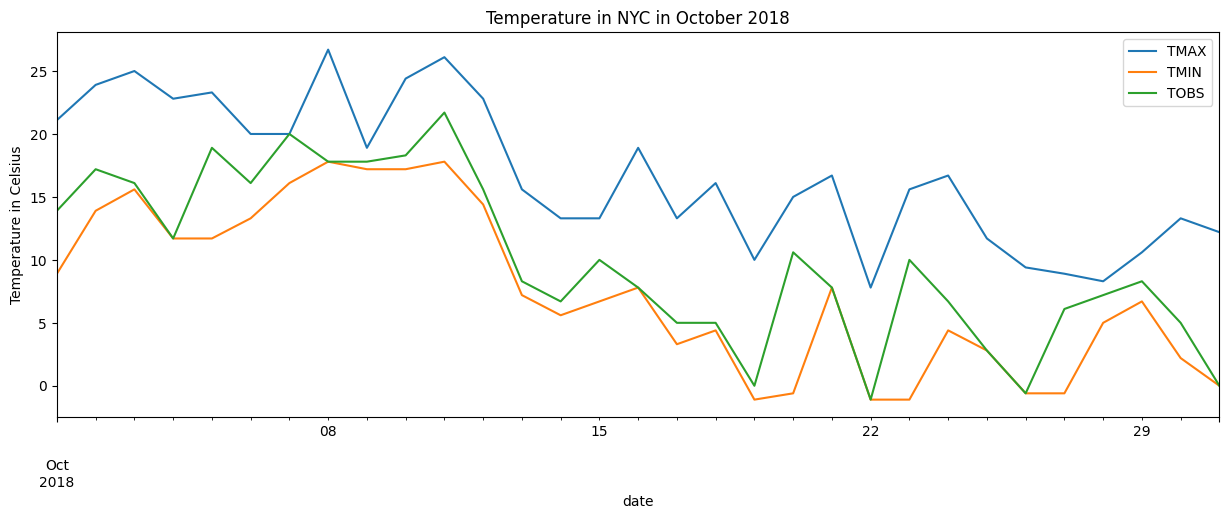

In [8]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15,5),
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

#### The long data format

In [9]:
long_df.head(6)

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9
5,2018-10-02,TOBS,17.2


In [12]:
long_df.describe()

,date,value
count,93,93.000000
mean,2018-10-16 00:00:00,11.470968
min,2018-10-01 00:00:00,-1.100000
25%,2018-10-08 00:00:00,6.700000
50%,2018-10-16 00:00:00,11.700000
75%,2018-10-24 00:00:00,17.200000
max,2018-10-31 00:00:00,26.700000
std,NaN,7.362354


In [11]:
long_df.describe(include='all')#, datetime_is_numeric=True)

,date,datatype,value
count,93,93,93.000000
unique,NaN,3,NaN
top,NaN,TMAX,NaN
freq,NaN,31,NaN
mean,2018-10-16 00:00:00,NaN,11.470968
min,2018-10-01 00:00:00,NaN,-1.100000
25%,2018-10-08 00:00:00,NaN,6.700000
50%,2018-10-16 00:00:00,NaN,11.700000
75%,2018-10-24 00:00:00,NaN,17.200000
max,2018-10-31 00:00:00,NaN,26.700000


In [13]:
sns.set(rc={'figure.figsize': (15, 5)}, style='white')

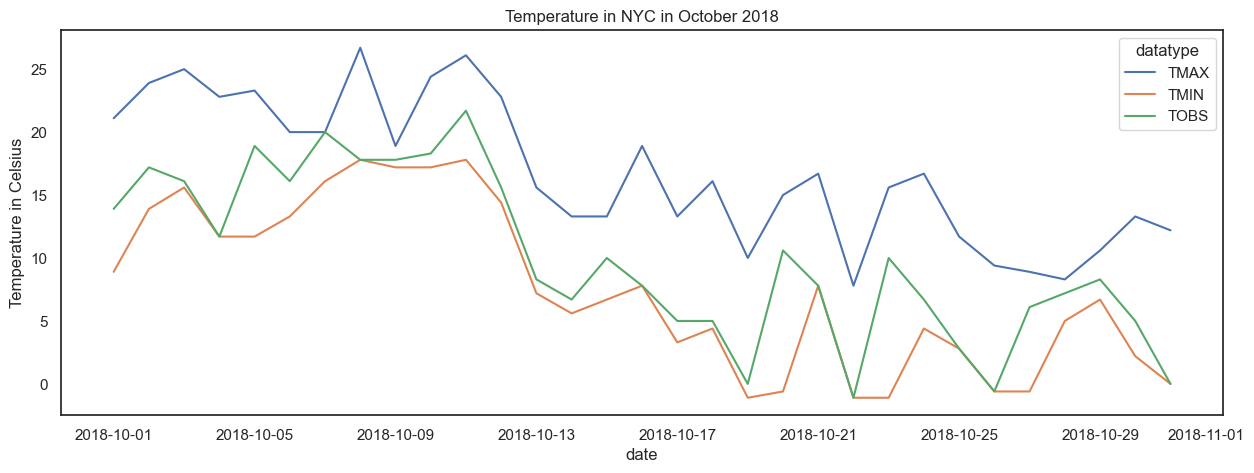

In [14]:
ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

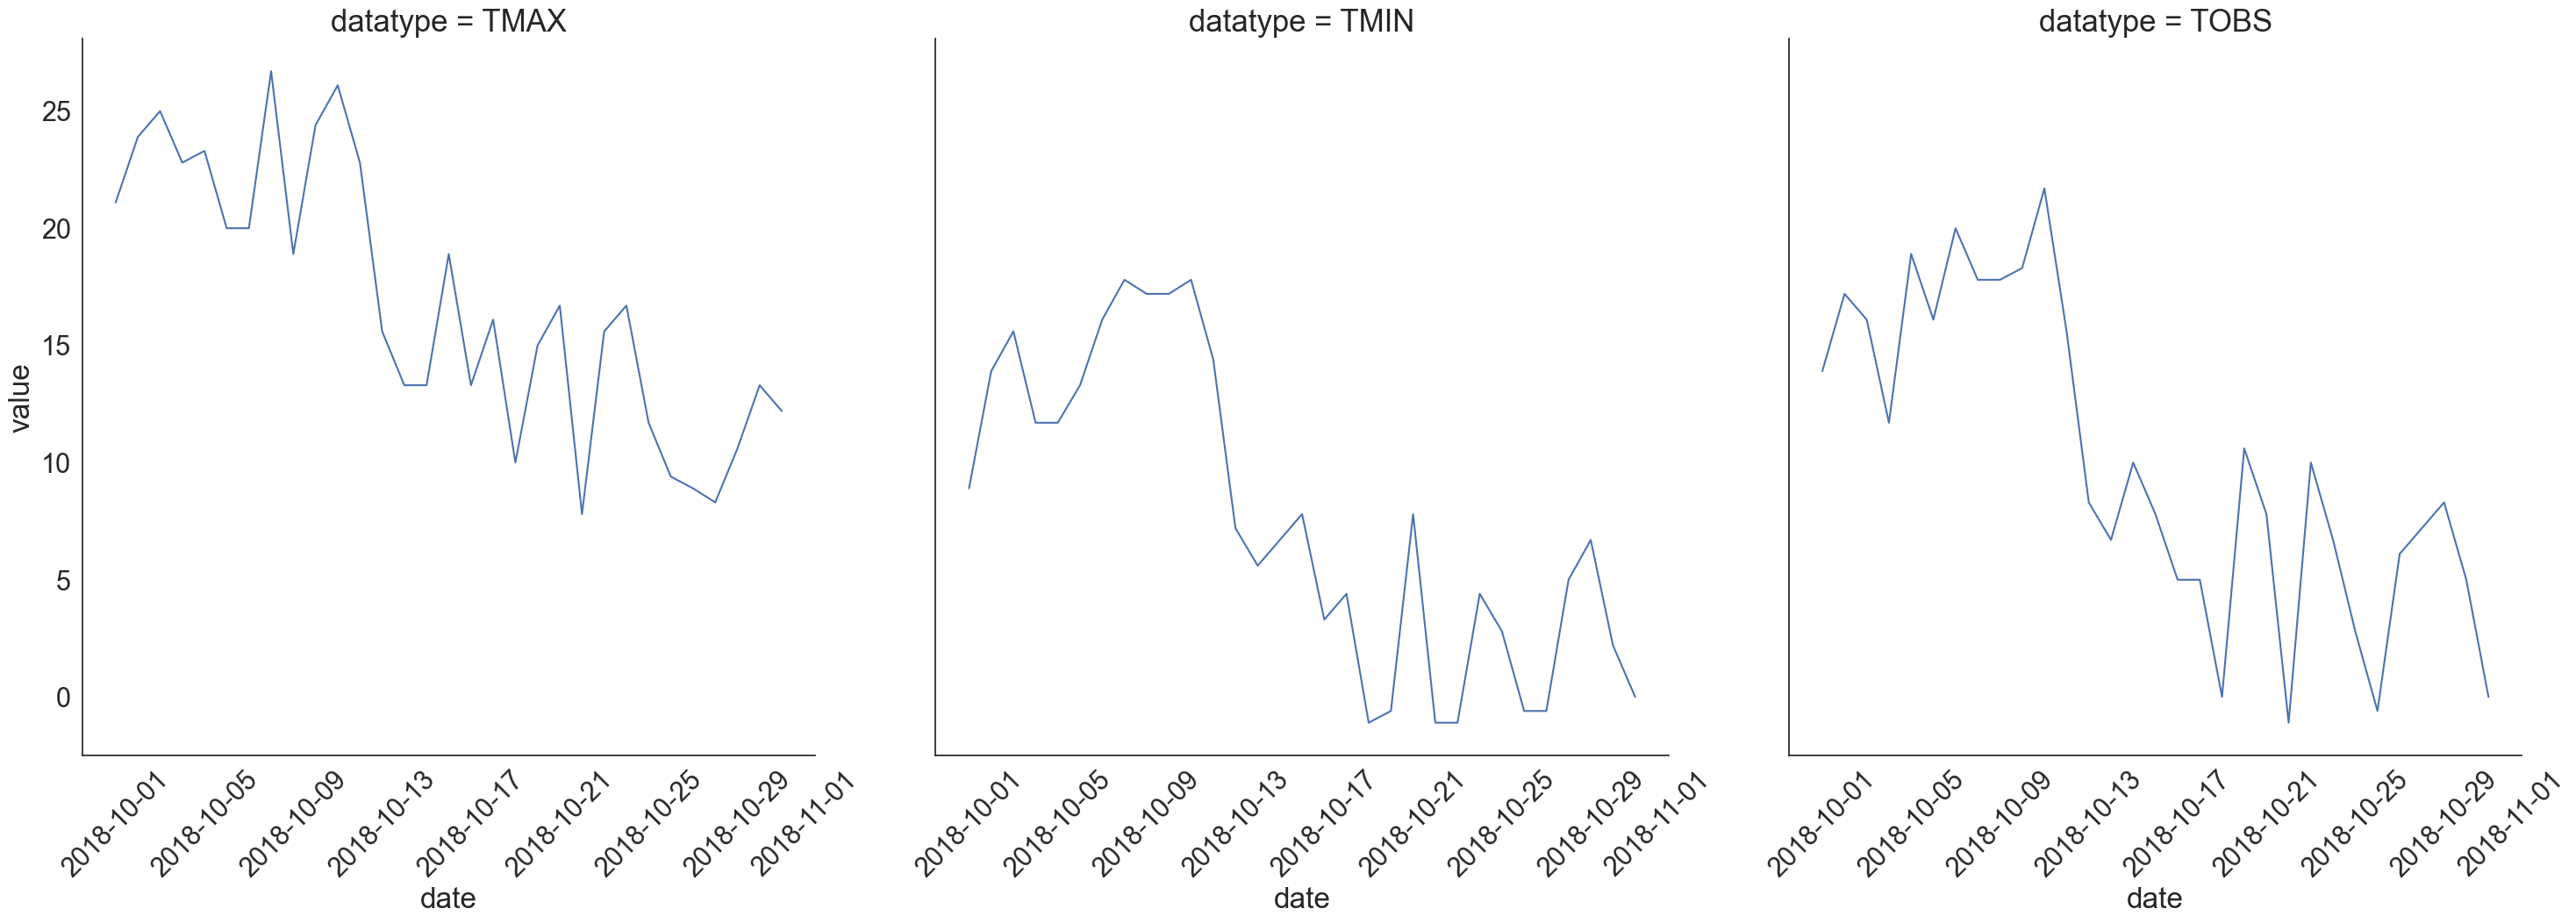

In [15]:
sns.set(
    rc={'figure.figsize': (20, 10)},
    style='white', font_scale=2
)
g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

### Data enrichment

## Exploring an API to find and collect temperature data

Started this in a new notebook